In [1]:
!pip install -i https://test.pypi.org/simple/ MDO==1.0.3

Looking in indexes: https://test.pypi.org/simple/


In [2]:
import seaborn as sns
import pandas as pd
import os 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

from MDO.main import MDO

sep = os.sep

path = f'{sep}home{sep}jojo{sep}PycharmProjects{sep}MDO{sep}TestData.csv'
Open = 'Open'
Close = 'Close'
Volume = 'Volume'

data_test = pd.read_csv(path)
X = data_test[[f'{Open}', f'{Close}']]

In [3]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-17,2889.750000,2897.270020,2887.300049,2889.669922,2889.669922,2810140000
1,2019-06-18,2906.709961,2930.790039,2905.439941,2917.750000,2917.750000,3437620000
2,2019-06-19,2920.550049,2931.739990,2911.429932,2926.459961,2926.459961,3287890000
3,2019-06-20,2949.600098,2958.060059,2931.500000,2954.179932,2954.179932,3905940000
4,2019-06-21,2952.709961,2964.149902,2946.870117,2950.459961,2950.459961,5000120000
...,...,...,...,...,...,...,...
249,2020-06-11,3123.530029,3123.530029,2999.489990,3002.100098,3002.100098,7018890000
250,2020-06-12,3071.040039,3088.419922,2984.469971,3041.310059,3041.310059,5832250000
251,2020-06-15,2993.760010,3079.760010,2965.659912,3066.590088,3066.590088,5740660000
252,2020-06-16,3131.000000,3153.449951,3076.060059,3124.739990,3124.739990,5829240000


In [4]:
params = { 
    'inference_type': 'bayesian',
    "n_components": 10,
    "covariance_type": 'full'
    } ### Bayesian or Usual one GMM and Parameters of GMM Sklearn

outlier_detection = MDO()

outlier_detection.fit(X, **params)

In [5]:
List_scoring_global = outlier_detection.get_scoring()

#### OR

In [6]:
X_scoring = X.copy()

X_scoring['global_score'] = outlier_detection.get_scoring() 

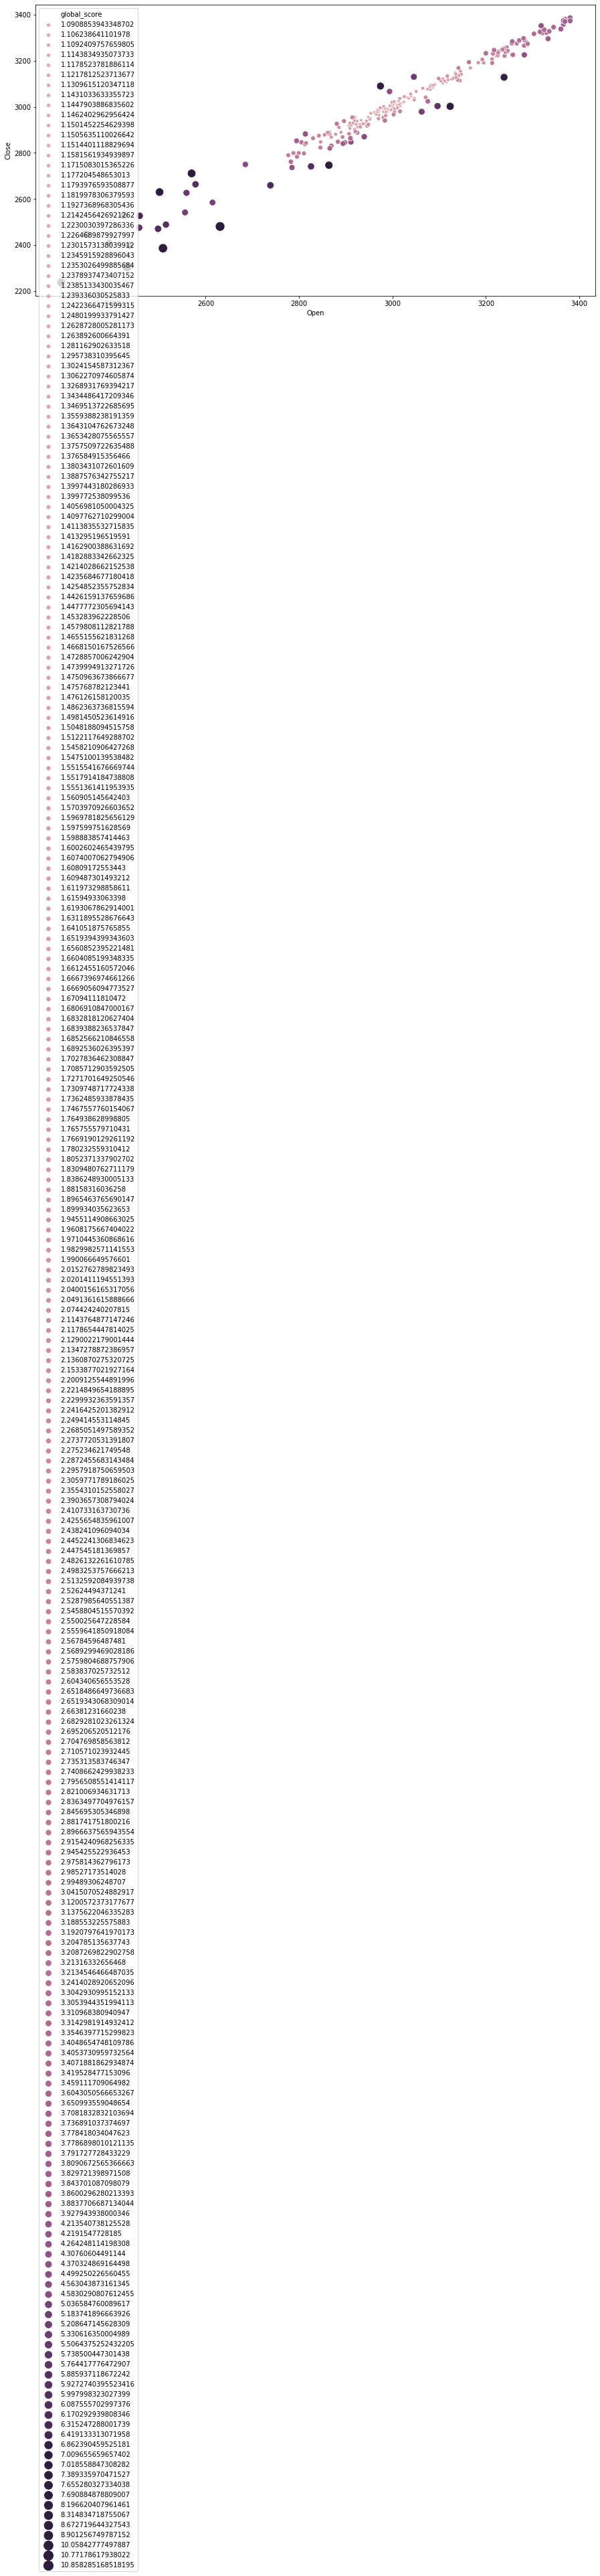

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=f"{Open}", y=f"{Close}",
                     hue="global_score", size="global_score",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=X_scoring)

In [8]:
X_3D = data_test[[f'{Open}', f'{Close}', f'{Volume}']]

params = { 
    'inference_type': 'bayesian',
    "n_components": 10,
    "covariance_type": 'full'
    } ### Bayesian or Usual one GMM and Parameters of GMM Sklearn

outlier_detection = MDO()

outlier_detection.fit(X_3D, **params)

In [9]:
X_scoring = X_3D.copy()

X_scoring['global_score'] = outlier_detection.get_scoring() 


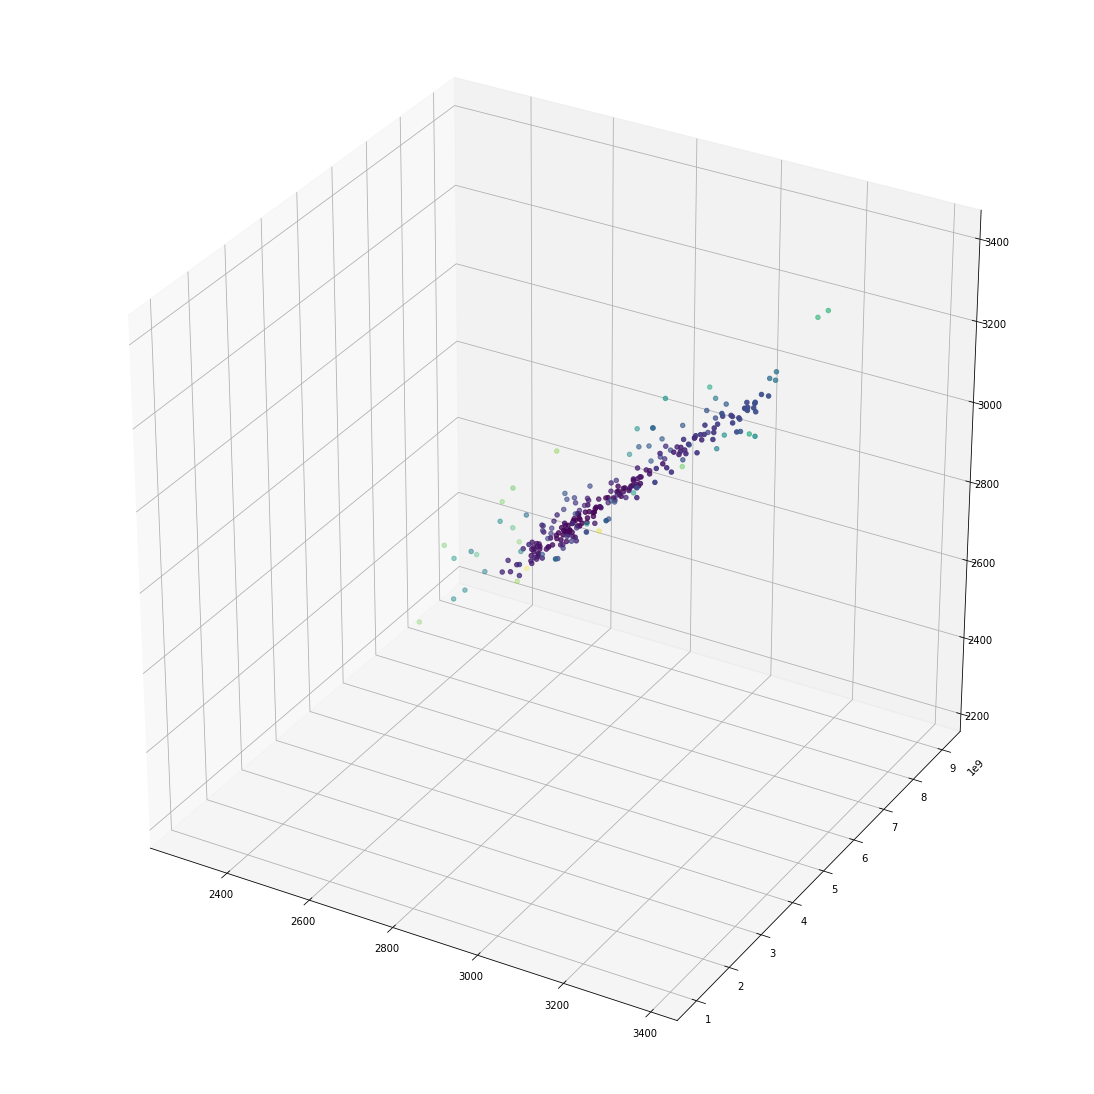

In [10]:
figsize=(15, 15)

fig = pyplot.figure(figsize=figsize)
ax = Axes3D(fig)

sequence_containing_x_vals = X_scoring.Open.to_list()
sequence_containing_y_vals = X_scoring.Volume.to_list()
sequence_containing_z_vals = X_scoring.Close.to_list()
color = X_scoring.global_score.to_list()

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals, c=color)

pyplot.show()